In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Salinity

Mounted at /content/drive
/content/drive/MyDrive/Salinity


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df=pd.read_csv('ECML.csv',nrows=10000, encoding='utf-8-sig')

# Drop unwanted features
df = df.drop(['P', 'K', 'aspect', 'slope', 'cvi', 'evi', 'SI2', 'SI3', 'SI4', 'SARVH', 'TWI'], axis=1)

# Define features(X) and target (y)
X = df.drop('EC', axis=1)
y = df['EC']

In [ ]:
df.head()

,EC,PH,OM,SP,elevation,ndvi,SI1,SI5,SI6,SI7,SARVV
0,0.57,8.0,0.40,32,131,0.317489,0.192168,0.402205,0.511961,0.639277,-8.488977
1,0.75,8.0,1.15,46,122,0.344294,0.181019,0.498877,0.506518,0.676360,-7.163118
2,0.82,8.0,0.87,32,99,0.330471,0.187973,0.449653,0.444705,0.410518,-7.875657
3,0.90,8.7,0.77,34,118,0.230769,0.116115,0.409036,0.513749,0.600761,-8.233532
4,0.94,8.0,0.63,34,81,0.371486,0.172457,0.489471,0.504088,0.658287,-8.448012


In [ ]:
X.head()

In [ ]:
y.head()

# **preprocess**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# **Simple LSTM**

Epoch 1/100
3/3 [==============================] - 6s 1s/step - loss: 36.3759 - val_loss: 45.4187
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 36.0696 - val_loss: 45.1613
Epoch 3/100
3/3 [==============================] - 0s 37ms/step - loss: 35.8376 - val_loss: 44.9010
Epoch 4/100
3/3 [==============================] - 0s 41ms/step - loss: 35.5770 - val_loss: 44.6207
Epoch 5/100
3/3 [==============================] - 0s 40ms/step - loss: 35.3296 - val_loss: 44.3278
Epoch 6/100
3/3 [==============================] - 0s 42ms/step - loss: 35.0631 - val_loss: 44.0269
Epoch 7/100
3/3 [==============================] - 0s 41ms/step - loss: 34.7835 - val_loss: 43.7332
Epoch 8/100
3/3 [==============================] - 0s 34ms/step - loss: 34.5292 - val_loss: 43.4368
Epoch 9/100
3/3 [==============================] - 0s 42ms/step - loss: 34.2488 - val_loss: 43.1415
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 33.9709 - val_loss: 42.8378
E

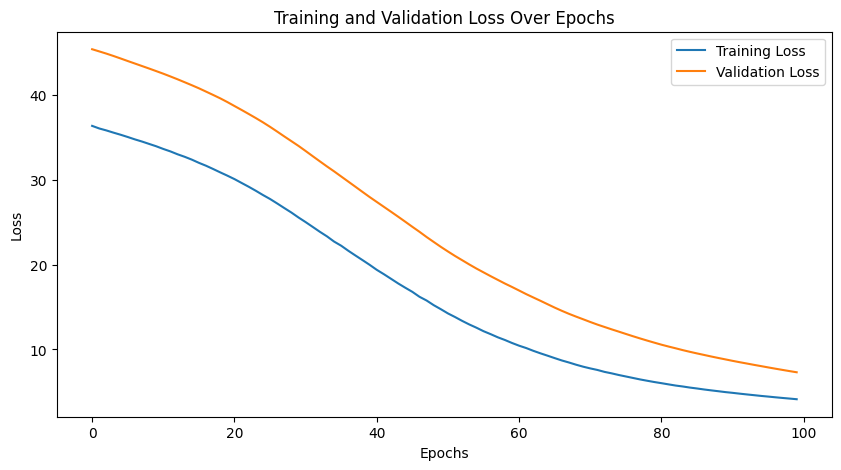

In [ ]:
# Define the LSTM model
simplelstm_model = Sequential([
    LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(units=1)
])

# Compile the model
simplelstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = simplelstm_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions
y_train_pred = simplelstm_model.predict(X_train_reshaped)
y_test_pred = simplelstm_model.predict(X_test_reshaped)


# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print evaluation metrics
print("Train R2:", train_r2)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)

print("Test R2:", test_r2)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)

Train R2: 0.7031630578886889
Train RMSE: 2.1050372893296947
Train MAE: 1.726410532700427
Train MAPE: 0.5439114915947458
Test R2: 0.7110231999425483
Test RMSE: 1.861759977983343
Test MAE: 1.5555144086373702
Test MAPE: 0.5831706599110396


In [ ]:
# Export train and test predictions to CSV
train_predictions_df = pd.DataFrame({'Actual': y_train.values, 'Predicted': y_train_pred.flatten()})
test_predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred.flatten()})
train_predictions_df.to_csv('train_predictionssimpleLSTM.csv', index=False)
test_predictions_df.to_csv('test_predictionssimpleLSTM.csv', index=False)


# **simple RNN**

Epoch 1/100
3/3 [==============================] - 1s 134ms/step - loss: 36.5045 - val_loss: 51.6306
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 35.6719 - val_loss: 50.5957
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 34.7911 - val_loss: 49.6198
Epoch 4/100
3/3 [==============================] - 0s 30ms/step - loss: 34.0778 - val_loss: 48.6611
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 33.3731 - val_loss: 47.7031
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 32.7123 - val_loss: 46.7874
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 32.0151 - val_loss: 45.9185
Epoch 8/100
3/3 [==============================] - 0s 21ms/step - loss: 31.3263 - val_loss: 45.0814
Epoch 9/100
3/3 [==============================] - 0s 22ms/step - loss: 30.7288 - val_loss: 44.2144
Epoch 10/100
3/3 [==============================] - 0s 22ms/step - loss: 30.1227 - val_loss: 43.387

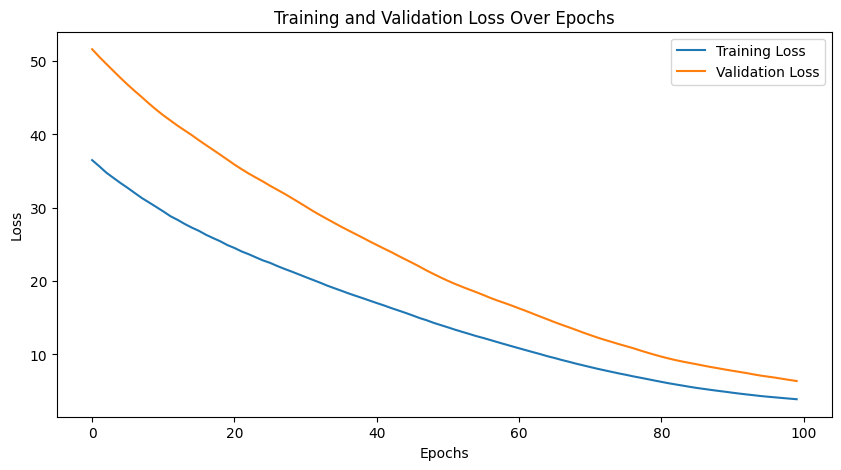

In [ ]:
# Define the Simple RNN model
simple_rnn_model = Sequential([
    SimpleRNN(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(units=1)
])

# Compile the Simple RNN model
optimizer = Adam(lr=0.001)
simple_rnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the Simple RNN model
history = simple_rnn_model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions
y_train_pred = simple_rnn_model.predict(X_train_reshaped)
y_test_pred = simple_rnn_model.predict(X_test_reshaped)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred)

# Print evaluation metrics
print("Train R2:", train_r2)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)
print("Train MAPE:", train_mape)

print("Test R2:", test_r2)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)
print("Test MAPE:", test_mape)

Train R2: 0.7247074110163702
Train RMSE: 2.0272069153001784
Train MAE: 1.7019000338992958
Train MAPE: 0.5871158245225199
Test R2: 0.7977527114016029
Test RMSE: 1.557519724419346
Test MAE: 1.2284791589847632
Test MAPE: 0.5312436440755582


In [ ]:
# Create DataFrame for train and test predictions
train_predictions_df = pd.DataFrame({'Actual': y_train.values, 'Predicted': y_train_pred.flatten()})
test_predictions_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_test_pred.flatten()})

# Export train predictions to CSV
train_predictions_df.to_csv('train_predictionssimpleRNN.csv', index=False)

# Export test predictions to CSV
test_predictions_df.to_csv('test_predictionssimpleRNN.csv', index=False)


# **simple FFNN**

Epoch 1/100
3/3 [==============================] - 3s 338ms/step - loss: 44.3449 - val_loss: 54.4872
Epoch 2/100
3/3 [==============================] - 0s 66ms/step - loss: 42.3598 - val_loss: 52.4334
Epoch 3/100
3/3 [==============================] - 0s 36ms/step - loss: 40.6144 - val_loss: 50.5738
Epoch 4/100
3/3 [==============================] - 0s 83ms/step - loss: 39.2257 - val_loss: 48.8653
Epoch 5/100
3/3 [==============================] - 0s 76ms/step - loss: 37.7079 - val_loss: 47.2982
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 36.3789 - val_loss: 45.7947
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 35.1867 - val_loss: 44.3706
Epoch 8/100
3/3 [==============================] - 0s 69ms/step - loss: 33.9954 - val_loss: 42.9920
Epoch 9/100
3/3 [==============================] - 0s 40ms/step - loss: 32.8990 - val_loss: 41.6060
Epoch 10/100
3/3 [==============================] - 0s 59ms/step - loss: 31.7159 - val_loss: 40.269

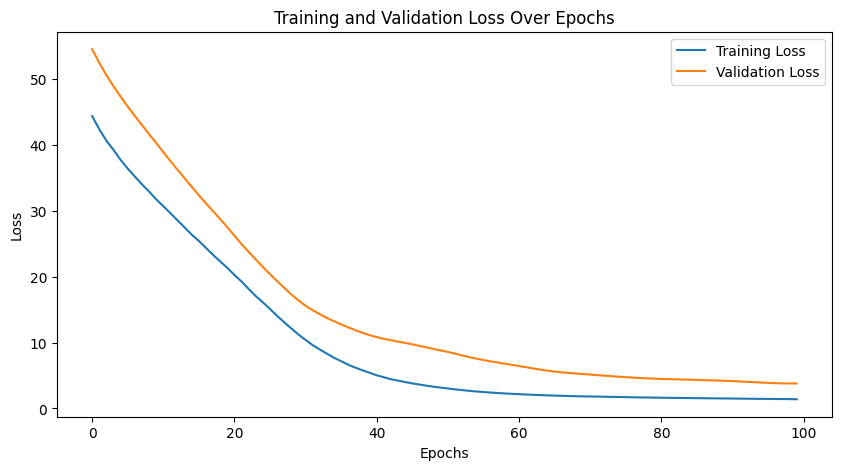

In [ ]:
from keras.layers import Flatten

# Define the FNN model
fnn_model_2 = Sequential([
    Flatten(input_shape=(X_train_scaled.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

# Compile the FNN model
fnn_model_2.compile(optimizer='adam', loss='mean_squared_error')

# Train the FNN model
history = fnn_model_2.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Make predictions
y_train_pred_fnn_2 = fnn_model_2.predict(X_train_scaled)
y_test_pred_fnn_2 = fnn_model_2.predict(X_test_scaled)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Evaluate the model
train_r2_fnn_2 = r2_score(y_train, y_train_pred_fnn_2)
train_rmse_fnn_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_fnn_2))
train_mae_fnn_2 = mean_absolute_error(y_train, y_train_pred_fnn_2)
train_mape_fnn_2 = mean_absolute_percentage_error(y_train, y_train_pred_fnn_2)

test_r2_fnn_2 = r2_score(y_test, y_test_pred_fnn_2)
test_rmse_fnn_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_fnn_2))
test_mae_fnn_2 = mean_absolute_error(y_test, y_test_pred_fnn_2)
test_mape_fnn_2 = mean_absolute_percentage_error(y_test, y_test_pred_fnn_2)

# Print evaluation metrics
print("FNN Model 2 Metrics:")
print("Train R2:", train_r2_fnn_2)
print("Train RMSE:", train_rmse_fnn_2)
print("Train MAE:", train_mae_fnn_2)
print("Train MAPE:", train_mape_fnn_2)
print("Test R2:", test_r2_fnn_2)
print("Test RMSE:", test_rmse_fnn_2)
print("Test MAE:", test_mae_fnn_2)
print("Test MAPE:", test_mape_fnn_2)

FNN Model 2 Metrics:
Train R2: 0.8887637722336033
Train RMSE: 1.2886172636502975
Train MAE: 0.8995920461489829
Train MAPE: 0.304977025781872
Test R2: 0.6942227829397878
Test RMSE: 1.9151145822379372
Test MAE: 1.3297816678455896
Test MAPE: 0.43278099003770987


In [ ]:
# Convert predictions arrays to DataFrames
train_predictions_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_fnn_2.flatten()})
test_predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_fnn_2.flatten()})

# Export DataFrames to CSV files
train_predictions_df.to_csv('train_predictions_fnn_simple.csv', index=False)
test_predictions_df.to_csv('test_predictions_fnn_simple.csv', index=False)


# **improved LSTM and FFNN**

Epoch 1/200
2/2 [==============================] - 5s 1s/step - loss: 36.4329 - val_loss: 45.6374
Epoch 2/200
2/2 [==============================] - 0s 39ms/step - loss: 36.2277 - val_loss: 45.4683
Epoch 3/200
2/2 [==============================] - 0s 75ms/step - loss: 36.0970 - val_loss: 45.2891
Epoch 4/200
2/2 [==============================] - 0s 74ms/step - loss: 35.8580 - val_loss: 45.0974
Epoch 5/200
2/2 [==============================] - 0s 56ms/step - loss: 35.7416 - val_loss: 44.9046
Epoch 6/200
2/2 [==============================] - 0s 59ms/step - loss: 35.5662 - val_loss: 44.6912
Epoch 7/200
2/2 [==============================] - 0s 73ms/step - loss: 35.3547 - val_loss: 44.4536
Epoch 8/200
2/2 [==============================] - 0s 53ms/step - loss: 35.1325 - val_loss: 44.2050
Epoch 9/200
2/2 [==============================] - 0s 54ms/step - loss: 34.8792 - val_loss: 43.9361
Epoch 10/200
2/2 [==============================] - 0s 52ms/step - loss: 34.6586 - val_loss: 43.6454
E

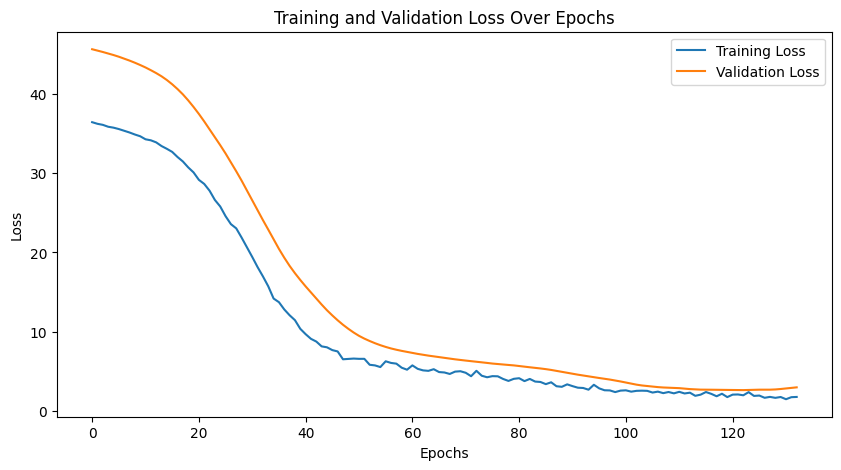

In [ ]:
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import EarlyStopping

# Define the LSTM model with increased complexity and regularization
improvedlstm_model = Sequential([
   LSTM(units=100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    #Dense(units=64),
    #Dropout(0.2),
    Dense(units=1),
    Activation('linear')
])

# Compile the LSTM model with a lower learning rate and learning rate scheduling
optimizer = Adam(lr=0.001)
improvedlstm_model.compile(optimizer=optimizer, loss='mean_squared_error')

from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the LSTM model with EarlyStopping
history = improvedlstm_model.fit(X_train_reshaped, y_train, epochs=200, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




Epoch 1/200
2/2 [==============================] - 1s 214ms/step - loss: 40.7746 - val_loss: 50.1731
Epoch 2/200
2/2 [==============================] - 0s 38ms/step - loss: 40.2644 - val_loss: 48.1956
Epoch 3/200
2/2 [==============================] - 0s 39ms/step - loss: 37.9563 - val_loss: 46.3460
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 36.0817 - val_loss: 44.6023
Epoch 5/200
2/2 [==============================] - 0s 39ms/step - loss: 34.6888 - val_loss: 42.9422
Epoch 6/200
2/2 [==============================] - 0s 40ms/step - loss: 33.1678 - val_loss: 41.3229
Epoch 7/200
2/2 [==============================] - 0s 39ms/step - loss: 32.1249 - val_loss: 39.7620
Epoch 8/200
2/2 [==============================] - 0s 57ms/step - loss: 30.4583 - val_loss: 38.2804
Epoch 9/200
2/2 [==============================] - 0s 60ms/step - loss: 29.7167 - val_loss: 36.8572
Epoch 10/200
2/2 [==============================] - 0s 40ms/step - loss: 28.5694 - val_loss: 35.501

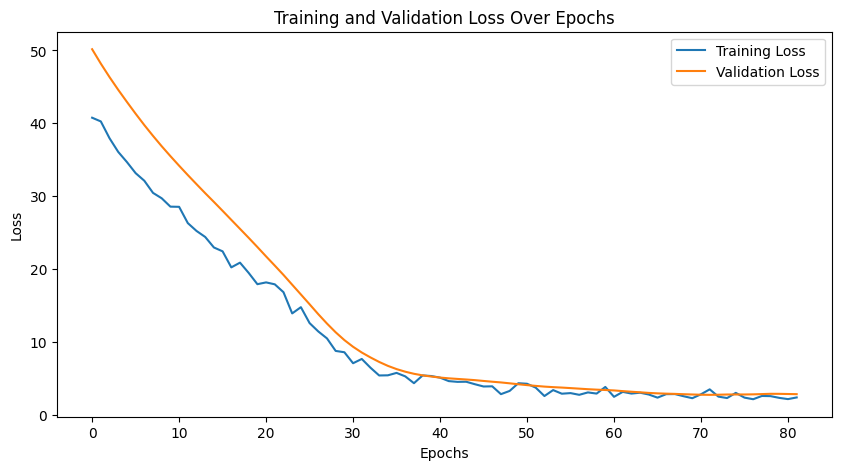

In [ ]:
# Define the FNN model with increased complexity and regularization
fnn_model = Sequential([
    Dense(units=100, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(units=50, activation='relu'),
    Dropout(0.2),
    Dense(units=1),
    Activation('linear')
])

# Compile the FNN model with a lower learning rate and learning rate scheduling
optimizer = Adam(lr=0.001)
fnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the FNN model with more epochs and batch_size
history = fnn_model.fit(X_train_scaled, y_train, epochs=200, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [ ]:
# Make predictions on train and test sets for LSTM model
y_train_pred_lstm = improvedlstm_model.predict(X_train_reshaped)
y_test_pred_lstm = improvedlstm_model.predict(X_test_reshaped)

# Evaluate the LSTM model
train_r2_lstm = r2_score(y_train, y_train_pred_lstm)
train_rmse_lstm = np.sqrt(mean_squared_error(y_train, y_train_pred_lstm))
train_mae_lstm = mean_absolute_error(y_train, y_train_pred_lstm)
train_mape_lstm = mean_absolute_percentage_error(y_train, y_train_pred_lstm)

test_r2_lstm = r2_score(y_test, y_test_pred_lstm)
test_rmse_lstm = np.sqrt(mean_squared_error(y_test, y_test_pred_lstm))
test_mae_lstm = mean_absolute_error(y_test, y_test_pred_lstm)
test_mape_lstm = mean_absolute_percentage_error(y_test, y_test_pred_lstm)

# Make predictions on train and test sets for FNN model
y_train_pred_fnn = fnn_model.predict(X_train_scaled)
y_test_pred_fnn = fnn_model.predict(X_test_scaled)

# Evaluate the FNN model
train_r2_fnn = r2_score(y_train, y_train_pred_fnn)
train_rmse_fnn = np.sqrt(mean_squared_error(y_train, y_train_pred_fnn))
train_mae_fnn = mean_absolute_error(y_train, y_train_pred_fnn)
train_mape_fnn = mean_absolute_percentage_error(y_train, y_train_pred_fnn)

test_r2_fnn = r2_score(y_test, y_test_pred_fnn)
test_rmse_fnn = np.sqrt(mean_squared_error(y_test, y_test_pred_fnn))
test_mae_fnn = mean_absolute_error(y_test, y_test_pred_fnn)
test_mape_fnn = mean_absolute_percentage_error(y_test, y_test_pred_fnn)

# Print evaluation metrics for LSTM and FNN models
print("LSTM Model Metrics:")
print("Train R2:", train_r2_lstm)
print("Train RMSE:", train_rmse_lstm)
print("Train MAE:", train_mae_lstm)
print("Train MAPE:", train_mape_lstm)

print("Test R2:", test_r2_lstm)
print("Test RMSE:", test_rmse_lstm)
print("Test MAE:", test_mae_lstm)
print("Test MAPE:", test_mape_lstm)

print("\nFNN Model Metrics:")
print("Train R2:", train_r2_fnn)
print("Train RMSE:", train_rmse_fnn)
print("Train MAE:", train_mae_fnn)
print("Train MAPE:", train_mape_fnn)

print("Test R2:", test_r2_fnn)
print("Test RMSE:", test_rmse_fnn)
print("Test MAE:", test_mae_fnn)
print("Test MAPE:", test_mape_fnn)

1/1 [==============================] - 0s 23ms/step
LSTM Model Metrics:
Train R2: 0.8828876854872376
Train RMSE: 1.322215064751536
Train MAE: 1.0321886314286124
Train MAPE: 0.35082614795597516
Test R2: 0.8239022893929655
Test RMSE: 1.4533461222503408
Test MAE: 1.0356443132672992
Test MAPE: 0.339951290124517

FNN Model Metrics:
Train R2: 0.8698169153712064
Train RMSE: 1.394049188130649
Train MAE: 1.1089834408406858
Train MAPE: 0.40059040081176867
Test R2: 0.7311741465555477
Test RMSE: 1.795674923859355
Test MAE: 1.2305635479518346
Test MAPE: 0.41023744614531815


In [ ]:
# Export predictions to CSV files
pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_lstm.flatten()}).to_csv('improvedlstm_train_predictions.csv', index=False)
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_lstm.flatten()}).to_csv('improvedlstm_test_predictions.csv', index=False)

pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_fnn.flatten()}).to_csv('improvedfnn_train_predictions.csv', index=False)
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_fnn.flatten()}).to_csv('improvedfnn_test_predictions.csv', index=False)

In [ ]:
# Ensemble the predictions from LSTM and FNN models
y_train_pred_ensemble = (y_train_pred_lstm + y_train_pred_fnn) / 2
y_test_pred_ensemble = (y_test_pred_lstm + y_test_pred_fnn) / 2

# Evaluate the ensemble model
train_r2_ensemble = r2_score(y_train, y_train_pred_ensemble)
train_rmse_ensemble = np.sqrt(mean_squared_error(y_train, y_train_pred_ensemble))
train_mae_ensemble = mean_absolute_error(y_train, y_train_pred_ensemble)
train_mape_ensemble = mean_absolute_percentage_error(y_train, y_train_pred_ensemble)

test_r2_ensemble = r2_score(y_test, y_test_pred_ensemble)
test_rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_test_pred_ensemble))
test_mae_ensemble = mean_absolute_error(y_test, y_test_pred_ensemble)
test_mape_ensemble = mean_absolute_percentage_error(y_test, y_test_pred_ensemble)

# Print evaluation metrics for ensemble model
print("\nEnsemble Model Metrics:")
print("Train R2:", train_r2_ensemble)
print("Train RMSE:", train_rmse_ensemble)
print("Train MAE:", train_mae_ensemble)
print("Train MAPE:", train_mape_ensemble)
print("Test R2:", test_r2_ensemble)
print("Test RMSE:", test_rmse_ensemble)
print("Test MAE:", test_mae_ensemble)
print("Test MAPE:", test_mape_ensemble)


Ensemble Model Metrics:
Train R2: 0.8857959309034
Train RMSE: 1.3056946001002505
Train MAE: 1.019650228759389
Train MAPE: 0.36394934847167604
Test R2: 0.8407370954829909
Test RMSE: 1.3821319841218151
Test MAE: 1.0143600761890412
Test MAPE: 0.35079320012854714


In [ ]:
# Export predictions to CSV files for ensemble model
pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred_ensemble.flatten()}).to_csv('ensemble_train_predictions.csv', index=False)
pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred_ensemble.flatten()}).to_csv('ensemble_test_predictions.csv', index=False)

# **SHAP**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.6 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
def predict_function(X):
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
    return improvedlstm_model.predict(X_reshaped)

In [ ]:

X_train_summary = shap.sample(X_train_scaled, 100)  # Create a background dataset
explainer = shap.KernelExplainer(predict_function, X_train_summary)
X_test_sample = shap.sample(X_test_scaled, 100)  # Create a sample dataset for explanations
shap_values = explainer.shap_values(X_test_sample)


shap_values_reshaped = np.array(shap_values).reshape(X_test_sample.shape)

plt.figure()

# Plot the SHAP summary plot
shap.summary_plot(shap_values_reshaped, X_test_sample, feature_names=X.columns)
# Show the plot
plt.show()

3/3 [==============================] - 0s 5ms/step


  0%|          | 0/28 [00:00<?, ?it/s]

2587/2587 [==============================] - 7s 3ms/step


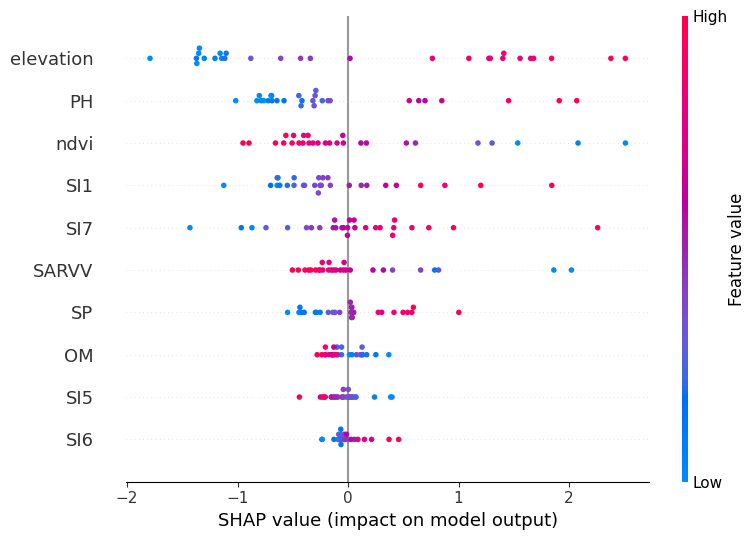

In [ ]:


# Define a function to reshape input and predict using your LSTM model
def predict_function(X):
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
    return improvedlstm_model.predict(X_reshaped)

# Create a SHAP explainer using your LSTM model and training data
explainer = shap.KernelExplainer(predict_function, X_train_scaled)

# Sample from the test set for explanations
X_test_sample = shap.sample(X_test_scaled, 100)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Reshape SHAP values to match the shape of the test sample
shap_values_reshaped = np.array(shap_values).reshape(X_test_sample.shape)

# Plot the SHAP summary plot
plt.figure()
shap.summary_plot(shap_values_reshaped, X_test_sample, feature_names=X.columns)
plt.show()


  0%|          | 0/81 [00:00<?, ?it/s]

2587/2587 [==============================] - 7s 3ms/step


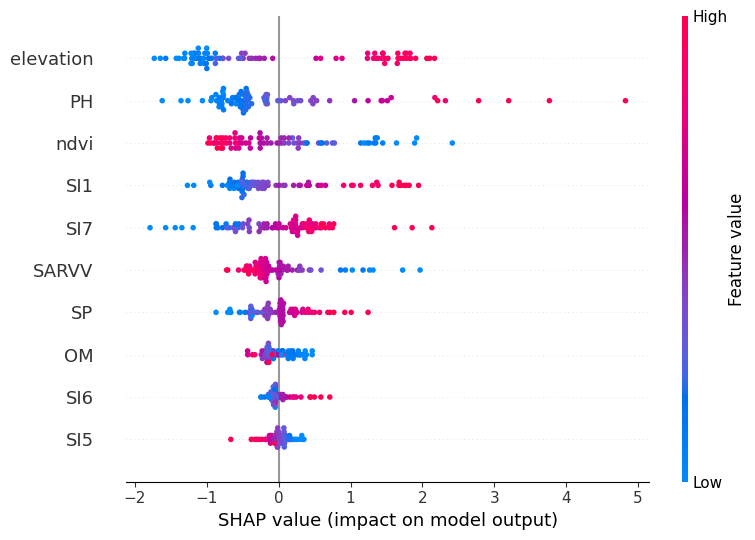

In [ ]:
# Sample from the training set for explanations
X_train_sample = shap.sample(X_train_scaled, 100)

# Calculate SHAP values for the training data
shap_values_train = explainer.shap_values(X_train_sample)

# Reshape SHAP values to match the shape of the train sample
shap_values_train_reshaped = np.array(shap_values_train).reshape(X_train_sample.shape)

# Plot the SHAP summary plot for the training data
plt.figure()
shap.summary_plot(shap_values_train_reshaped, X_train_sample, feature_names=X.columns, title="SHAP Summary Plot - Train Data")
plt.show()

In [ ]:
# Save SHAP values for the test data to CSV files
for i, shap_values_sample in enumerate(shap_values):
    np.savetxt(f'shap_values_test_sampleLSTM_{i}.csv', shap_values_sample, delimiter=',')

# Save SHAP values for the training data to CSV files
for i, shap_values_train_sample in enumerate(shap_values_train):
    np.savetxt(f'shap_values_train_sampleLSTM_{i}.csv', shap_values_train_sample, delimiter=',')


# **SHAP for improved FFNN**

3/3 [==============================] - 0s 5ms/step


  0%|          | 0/28 [00:00<?, ?it/s]

2587/2587 [==============================] - 5s 2ms/step


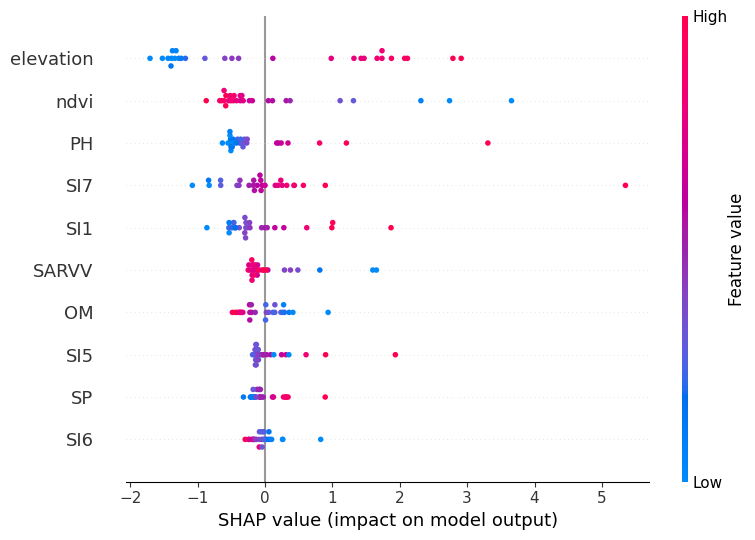

In [ ]:
# Define a function to reshape input and predict using your LSTM model
def predict_function(X):
    X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))
    return fnn_model.predict(X_reshaped)

# Create a SHAP explainer using your LSTM model and training data
explainer = shap.KernelExplainer(predict_function, X_train_scaled)

# Sample from the test set for explanations
X_test_sample = shap.sample(X_test_scaled, 100)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Reshape SHAP values to match the shape of the test sample
shap_values_reshaped = np.array(shap_values).reshape(X_test_sample.shape)

# Plot the SHAP summary plot
plt.figure()
shap.summary_plot(shap_values_reshaped, X_test_sample, feature_names=X.columns)
plt.show()


  0%|          | 0/81 [00:00<?, ?it/s]

2587/2587 [==============================] - 4s 2ms/step


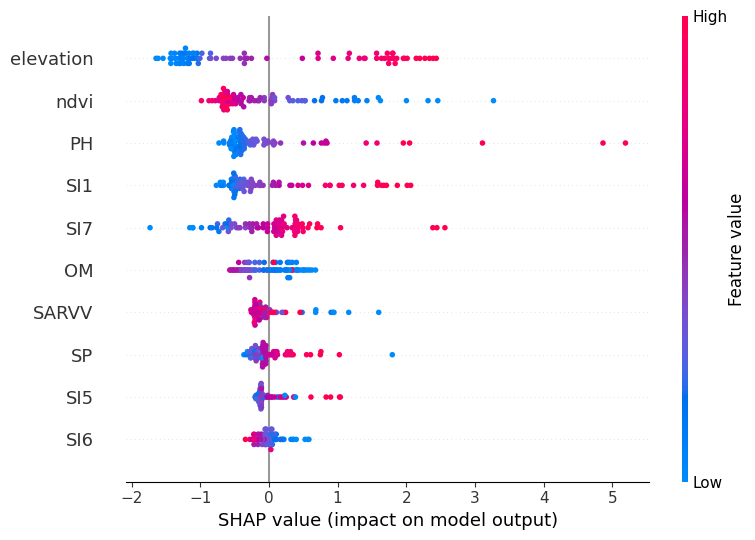

In [ ]:
# Sample from the training set for explanations
X_train_sample = shap.sample(X_train_scaled, 100)

# Calculate SHAP values for the training data
shap_values_train = explainer.shap_values(X_train_sample)

# Reshape SHAP values to match the shape of the train sample
shap_values_train_reshaped = np.array(shap_values_train).reshape(X_train_sample.shape)

# Plot the SHAP summary plot for the training data
plt.figure()
shap.summary_plot(shap_values_train_reshaped, X_train_sample, feature_names=X.columns, title="SHAP Summary Plot - Train Data")
plt.show()

In [ ]:
# Save SHAP values for the test data to CSV files
for i, shap_values_sample in enumerate(shap_values):
    np.savetxt(f'shap_values_test_sampleFNN_{i}.csv', shap_values_sample, delimiter=',')

# Save SHAP values for the training data to CSV files
for i, shap_values_train_sample in enumerate(shap_values_train):
    np.savetxt(f'shap_values_train_sampleFNN_{i}.csv', shap_values_train_sample, delimiter=',')

